In [8]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy as sp
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pylab as plt
import os
import statsmodels.api as sm

/Users/simonsharp/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [9]:
os.chdir('/Users/simonsharp/Desktop/LaborData')

In [10]:
dt = pd.read_csv('Non_DoD_201409.txt', sep='|', low_memory=False, header=None)
dt.columns=['LastName', 'FirstName', 'Date', 'Agency', 'SubAgency', 'State', 'AgeRange', 'YearsSinceDegree', 'EducationLevel', 'PayPlan', 'Grade', 'LengthOfServiceLevel', 'Occupation', 'OccupationalCategory', 'AdjustedBasicPay', 'Supervisor', 'TypeOfAppointment', 'WorkSchedule', 'NSFTPIndicator']
dt.head(20)

,LastName,FirstName,Date,Agency,SubAgency,State,AgeRange,YearsSinceDegree,EducationLevel,PayPlan,Grade,LengthOfServiceLevel,Occupation,OccupationalCategory,AdjustedBasicPay,Supervisor,TypeOfAppointment,WorkSchedule,NSFTPIndicator
0,UPADHYAYA,SUNIT,201409,TD-DEPARTMENT OF TRANSPORTATION,"TD11-OFFICE OF THE SECRETARY, RESEARCH AND TEC...",25,25-29,0 - 4 years,13,GS,11,1 - 2 years,2210-INFORMATION TECHNOLOGY MANAGEMENT,A,63386.00,8,15,F,1
1,NAME WITHHELD BY OPM,NAME WITHHELD BY OPM,201409,HS-DEPARTMENT OF HOMELAND SECURITY,HSBC-TRANSPORTATION SECURITY ADMINISTRATION,##,30-34,0 - 4 years,13,SV,D,Less than 1 year,1802-COMPLIANCE INSPECTION AND SUPPORT,C,33855.00,8,38,P,2
2,MAJUMDAR,RAJTILAK,201409,AG-DEPARTMENT OF AGRICULTURE,AG03-AGRICULTURAL RESEARCH SERVICE,36,35-39,0 - 4 years,21,GS,11,1 - 2 years,0401-GENERAL NATURAL RESOURCES MANAGEMENT AND ...,P,59915.00,8,42,F,2
3,CIOBAN CHERESTESIU,CARMEN,201409,VA-DEPARTMENT OF VETERANS AFFAIRS,VATA-VETERANS HEALTH ADMINISTRATION,50,40-44,15 - 19 years,06,VN,02,1 - 2 years,0610-NURSE,P,66938.00,8,38,F,1
4,SHAHI,RAJU,201409,VA-DEPARTMENT OF VETERANS AFFAIRS,VATA-VETERANS HEALTH ADMINISTRATION,25,40-44,15 - 19 years,13,GS,06,1 - 2 years,0681-DENTAL ASSISTANT,T,43679.00,8,38,F,1
5,NAME WITHHELD BY OPM,NAME WITHHELD BY OPM,201409,TR-DEPARTMENT OF THE TREASURY,TR93-INTERNAL REVENUE SERVICE,25,45-49,Unspecified,04,GS,05,Less than 1 year,0592-TAX EXAMINING,C,34576.00,8,15,F,1
6,MCKONE,NORMAN,201409,ST-DEPARTMENT OF STATE,ST00-DEPARTMENT OF STATE,11,65 or more,Unspecified,09,GS,11,35 or more,0391-TELECOMMUNICATIONS,A,82019.00,8,20,I,2
7,SMITH,DAVID,201409,VA-DEPARTMENT OF VETERANS AFFAIRS,VATA-VETERANS HEALTH ADMINISTRATION,08,65 or more,45 - 49 years,15,AD,PH,5 - 9 years,0602-MEDICAL OFFICER,P,175700.00,8,38,I,2
8,QUIGLEY,DAVID,201409,VA-DEPARTMENT OF VETERANS AFFAIRS,VATA-VETERANS HEALTH ADMINISTRATION,44,65 or more,50 years & over,15,AD,PH,10 - 14 years,0602-MEDICAL OFFICER,P,223830.00,8,38,P,2
9,GREENE,ALTON,201409,AG-DEPARTMENT OF AGRICULTURE,AG11-FOREST SERVICE,16,65 or more,Unspecified,04,GS,06,10 - 14 years,0462-FORESTRY TECHNICIAN,T,35256.00,8,20,F,2


In [11]:
df=dt[["EducationLevel","AdjustedBasicPay"]]
#print(df.head(20))
df=df[(df.AdjustedBasicPay != ".") & (df.EducationLevel != ' ') & (df.AdjustedBasicPay != "############") & (df.EducationLevel != "*")]
#print(df.head(20))
df.head(20)

,EducationLevel,AdjustedBasicPay
0,13,63386.00
1,13,33855.00
2,21,59915.00
3,06,66938.00
4,13,43679.00
5,04,34576.00
6,09,82019.00
7,15,175700.00
8,15,223830.00
9,04,35256.00


In [12]:
df=df.sample(10000)
df=df.astype(float)
df.info()
df.EducationLevel.dtype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 180820 to 833130
Data columns (total 2 columns):
EducationLevel      10000 non-null float64
AdjustedBasicPay    10000 non-null float64
dtypes: float64(2)
memory usage: 234.4 KB


dtype('float64')

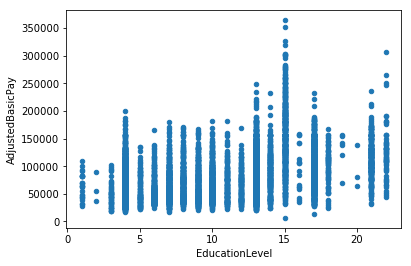

In [13]:
df.reset_index(drop=True, inplace=True)
#print(df)
df.plot.scatter(x='EducationLevel',y='AdjustedBasicPay')

In [23]:
X = df["EducationLevel"]
y = df["AdjustedBasicPay"]

In [24]:
model = sm.OLS(y,X).fit()

predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       AdjustedBasicPay   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                 4.157e+04
Date:                Sun, 30 Jul 2017   Prob (F-statistic):               0.00
Time:                        15:43:23   Log-Likelihood:            -1.2010e+05
No. Observations:               10000   AIC:                         2.402e+05
Df Residuals:                    9999   BIC:                         2.402e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
EducationLevel  6784.1471     33.275    203.879      0.000    6718.921    6849.373
==============================================================================
Omnibus:                      893.586   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1564.895
Skew:                           0.637   Prob(JB):                         0.00
Kurtosis:                       4.460   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
X = df["EducationLevel"]
y = df["AdjustedBasicPay"]
X = sm.add_constant(X)

In [26]:
model = sm.OLS(y,X).fit()

predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       AdjustedBasicPay   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     2372.
Date:                Sun, 30 Jul 2017   Prob (F-statistic):               0.00
Time:                        15:43:41   Log-Likelihood:            -1.1895e+05
No. Observations:               10000   AIC:                         2.379e+05
Df Residuals:                    9998   BIC:                         2.379e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.349e+04    853.769     50.938      0.000    4.18e+04    4.52e+04
EducationLevel  3476.5667     71.383     48.703      0.000    3336.641    3616.493
==============================================================================
Omnibus:                     2418.495   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7349.805
Skew:                           1.244   Prob(JB):                         0.00
Kurtosis:                       6.383   Cond. No.                         29.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""